## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
study_data_complete['Mouse ID'].value_counts()

g989    13
c139    10
g316    10
i177    10
k483    10
        ..
d133     1
v199     1
h428     1
u153     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_study_data = study_data_complete.groupby(['Mouse ID'])
grouped_study_data.count()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_mouse = study_data_complete[study_data_complete['Mouse ID'] == "g989"].index
study_data_complete.drop(drop_mouse, inplace=True)
study_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
study_data_complete['Mouse ID'].value_counts()

c139    10
g316    10
c264    10
i177    10
k483    10
        ..
d133     1
v199     1
h428     1
u153     1
o848     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
study_stats = study_data_complete[['Drug Regimen','Tumor Volume (mm3)']]

def study_summary(study_stats):
    names = {'Mean':  round(study_stats['Tumor Volume (mm3)'].mean()),
        'Median': round(study_stats['Tumor Volume (mm3)'].median()),
        'Variance':  round(study_stats['Tumor Volume (mm3)'].var()),
        'Standard Deviation': round(study_stats['Tumor Volume (mm3)'].std()),
        'SEM': round(study_stats['Tumor Volume (mm3)'].sem())}

    return pd.Series(names, index=['Mean', 'Median', 'Variance',
                                   'Standard Deviation', 'SEM'])

study_stats_summary = study_stats.groupby('Drug Regimen').apply(study_summary)
study_stats_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,41.0,42.0,25.0,5.0,0.0
Ceftamin,53.0,52.0,39.0,6.0,0.0
Infubinol,53.0,52.0,43.0,7.0,0.0
Ketapril,55.0,54.0,69.0,8.0,1.0
Naftisol,54.0,53.0,66.0,8.0,1.0
Placebo,54.0,52.0,61.0,8.0,1.0
Propriva,52.0,50.0,44.0,7.0,1.0
Ramicane,40.0,41.0,23.0,5.0,0.0
Stelasyn,54.0,52.0,59.0,8.0,1.0


## Bar and Pie Charts

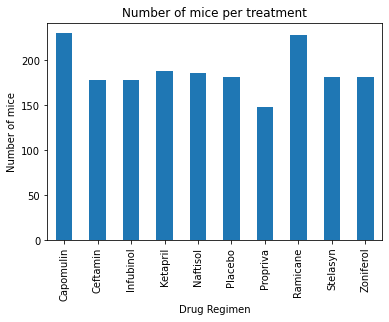

In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
import numpy as np

mouse_data = study_data_complete[['Drug Regimen','Mouse ID']]
mouse_bar = mouse_data.groupby('Drug Regimen')
mouse_count = mouse_bar['Mouse ID'].count()

mouse_chart = mouse_count.plot(kind="bar", title="Number of mice per treatment")
mouse_chart.set_xlabel("Drug Regimen")
mouse_chart.set_ylabel("Number of mice")

plt.show()

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


(-1.1065502689644005,
 1.1003119175697333,
 -1.1041200173094385,
 1.1079114197007642)

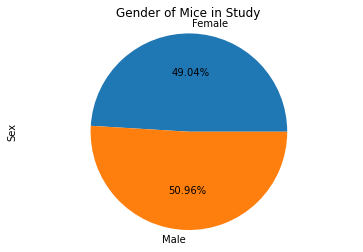

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender = study_data_complete[['Mouse ID', 'Sex']]
mouse_pie = mouse_gender.groupby('Sex')
mouse_gender_count = mouse_pie['Mouse ID'].count()
mouse_list = mouse_gender_count.keys()

mouse_pie_chart = mouse_gender_count.plot(kind="pie", y=mouse_list, title = "Gender of Mice in Study", autopct='%.2f%%')
mouse_pie_chart.set_ylabel("Sex")
plt.show
plt.axis("equal")

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
tumor_data = study_data_complete[['Drug Regimen', 'Mouse ID', 'Timepoint']]
tumor_data = tumor_data.loc[tumor_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
grouped_tumor_data = tumor_data.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max()
grouped_tumor_data

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_timepoint = pd.merge(study_data_complete, grouped_tumor_data, how="left", on=["Drug Regimen", "Mouse ID"])
tumor_timepoint.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45.0
1,k403,Ramicane,Male,21,16,5,38.825898,0,45.0
2,k403,Ramicane,Male,21,16,10,35.014271,1,45.0
3,k403,Ramicane,Male,21,16,15,34.223992,1,45.0
4,k403,Ramicane,Male,21,16,20,32.997729,1,45.0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
